# Obtener información y datos las boyas de IHData pertenecientes a la red de PdE
### Para ello, se utilizará la WEB de PdE

In [27]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr

#### Se obtienen la información de boyas

In [23]:
df = pd.read_csv('boyas.csv')
df

,Nombre,Longitud,Latitud,Cadencia,Codigo,Profundidad,InicioMedida,UltimaMedida,TipoSensor,Modelo,ConjuntoDatos
0,Bilbao-Vizcaya,-3.04,43.64,60,2136,580,07-11-1990,18-07-2019,Direccional Met-Oce,SeaWatch,REDEXT
1,Cabo_de_Pennas,-6.18,43.75,60,2242,615,09-06-1998,18-07-2019,Direccional Met-Oce,SeaWatch,REDEXT
2,Estaca_de_Bares,-7.68,44.12,60,2244,1800,19-07-1996,11-09-2015,Direccional Met-Oce,SeaWatch,REDEXT
3,Villano-Sisargas,-9.21,43.80,60,2246,386,12-05-1998,11-09-2015,Direccional Met-Oce,SeaWatch,REDEXT
4,Cabo_Silleiro,-9.43,42.12,60,2248,600,06-07-1998,23-04-2020,Direccional Met-Oce,SeaWatch,REDEXT
5,Golfo_de_Cadiz,-6.96,36.49,60,2342,450,27-08-1996,29-03-2016,Direccional Met-Oce,SeaWatch,REDEXT
6,Alboran,-5.03,36.27,60,2542,530,17-02-1997,25-02-2016,Direccional Met-Oce,SeaWatch,REDEXT
7,Cabo_de_Gata,-2.34,36.57,60,2548,536,27-03-1998,13-04-2014,Direccional Met-Oce,SeaWatch,REDEXT
8,Cabo_de_Palos,-0.31,37.65,60,2610,230,18-07-2006,03-04-2020,Direccional Met-Oce,SeaWatch,REDEXT
9,Valencia,-0.20,39.51,60,2630,260,15-09-2005,15-06-2020,Direccional Met-Oce,SeaWatch,REDEXT


In [34]:
m = folium.Map(location=(39, -5), zoom_start=5)
for nombre, lat, lon in zip(df.Nombre, df.Latitud, df.Longitud):
    folium.Marker(location=[lat, lon], tooltip=folium.Tooltip(nombre, permanent=True)).add_to(m)
m

Text(0.5, 1.0, 'Tiempo de mediciones')

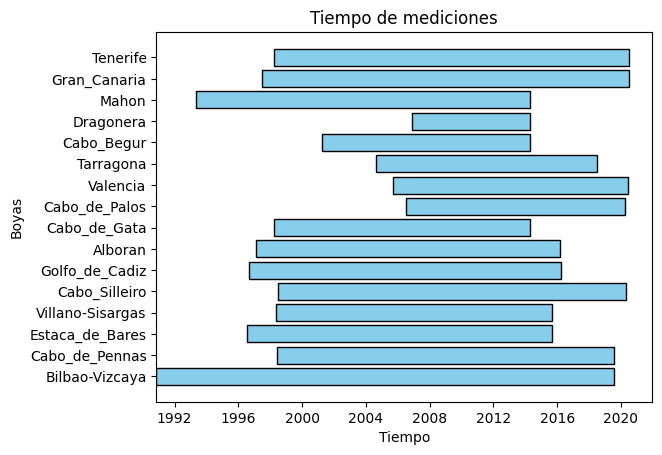

In [33]:
fig, ax = plt.subplots()
for i, task in df.iterrows():
    start = dt.datetime.strptime(task['InicioMedida'], '%d-%m-%Y')
    finish = dt.datetime.strptime(task['UltimaMedida'], '%d-%m-%Y')
    ax.barh(task['Nombre'], (finish - start).days, left=start, color='skyblue', edgecolor='black')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Boyas')
ax.set_title('Tiempo de mediciones')

#### Explorar datos

In [22]:
for nombre in df.Nombre:
    data = xr.open_dataset(f'data/{nombre}_Ext.nc')
    print(nombre, data.time[0].values, data.time[-1].values)

Bilbao-Vizcaya 1990-11-07T12:00:00.000000000 2019-07-18T00:00:00.000000000
Cabo_de_Pennas 1997-06-09T21:59:59.999996416 2019-07-18T00:00:00.000000000
Estaca_de_Bares 1996-07-19T15:00:00.000000000 2015-09-11T00:00:00.000000000
Villano-Sisargas 1998-05-12T23:00:00.000003584 2015-09-11T00:59:59.999996416
Cabo_Silleiro 1998-07-06T20:00:00.000003584 2020-04-23T00:00:00.000000000
Golfo_de_Cadiz 1996-08-27T18:00:00.000000000 2016-03-29T00:59:59.999996416
Alboran 1997-02-17T11:00:00.000003584 2006-02-25T23:00:00.000003584
Cabo_de_Gata 1998-03-27T21:59:59.999996416 2014-04-13T21:00:00.000000000
Cabo_de_Palos 2006-07-18T05:00:00.000003584 2020-04-03T00:59:59.999996416
Valencia 2005-09-15T15:59:59.999996416 2020-06-15T00:59:59.999996416
Tarragona 2004-08-20T14:00:00.000003584 2018-06-22T00:59:59.999996416
Cabo_Begur 2001-03-27T06:59:59.999996416 2014-04-13T21:00:00.000000000
Dragonera 2006-11-29T17:00:00.000003584 2014-04-13T21:00:00.000000000
Mahon 1993-04-29T12:00:00.000000000 2014-04-13T21:00: